In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "C:/Users/adity/Desktop/run jupyter/data/train_data/Potato___healthy"
train_files_early_blight = "C:/Users/adity/Desktop/run jupyter/data/train_data/Potato___Early_blight"
train_files_late_blight = "C:/Users/adity/Desktop/run jupyter/data/train_data/Potato___Late_blight"

valid_files_healthy = "C:/Users/adity/Desktop/run jupyter/data/valid_data/Potato___healthy"
valid_files_early_blight = "C:/Users/adity/Desktop/run jupyter/data/valid_data/Potato___Early_blight"
valid_files_late_blight =  "C:/Users/adity/Desktop/run jupyter/data/valid_data/Potato___Late_blight"


print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of potato early blight leaf images in training set", total_files(train_files_early_blight))
print("Number of potato late blight leaf images in training set", total_files(train_files_late_blight))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of potato early blight leaf images in validation set", total_files(valid_files_early_blight))
print("Number of potato late blight leaf images in validation set", total_files(valid_files_late_blight))

Number of healthy leaf images in training set 1824
Number of potato early blight leaf images in training set 1939
Number of potato late blight leaf images in training set 1939
Number of healthy leaf images in validation set 456
Number of potato early blight leaf images in validation set 485
Number of potato late blight leaf images in validation set 485


Healthy image illustration:


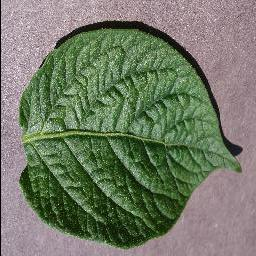

In [2]:
from PIL import Image
import IPython.display as display
print("Healthy image illustration:")
image_path = 'C:/Users/adity/Desktop/run jupyter/data/train_data/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864_270deg.JPG'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

Early blight potato:


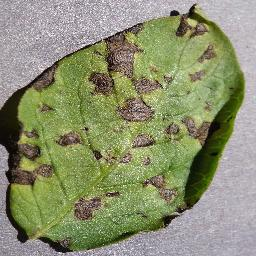

In [3]:
from PIL import Image
import IPython.display as display
print("Early blight potato:")
image_path = 'C:/Users/adity/Desktop/run jupyter/data/train_data/Potato___Early_blight/0faca7fe-7254-4dfa-8388-bbc776338c9c___RS_Early.B 7929.JPG'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))
    

Late blight potato:


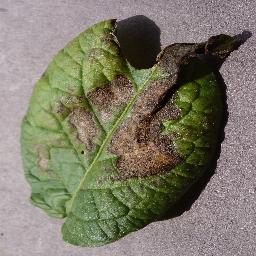

In [4]:
from PIL import Image
import IPython.display as display
print("Late blight potato:")
image_path = 'C:/Users/adity/Desktop/run jupyter/data/train_data/Potato___Late_blight/1f440bb7-e35d-4bc9-a807-81dac78c54b8___RS_LB 2727.JPG'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory('C:/Users/adity/Desktop/run jupyter/data/train_data',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('C:/Users/adity/Desktop/run jupyter/data/valid_data',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 5702 images belonging to 3 classes.
Found 1426 images belonging to 3 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

d:\New folder (2)\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/10


d:\New folder (2)\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 578ms/step - accuracy: 0.6327 - loss: 1.8474 - val_accuracy: 0.7468 - val_loss: 0.7171
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 546ms/step - accuracy: 0.9143 - loss: 0.2276 - val_accuracy: 0.7314 - val_loss: 0.9431
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 556ms/step - accuracy: 0.9321 - loss: 0.1704 - val_accuracy: 0.8492 - val_loss: 0.5144
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 543ms/step - accuracy: 0.9472 - loss: 0.1315 - val_accuracy: 0.9011 - val_loss: 0.3181
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 544ms/step - accuracy: 0.9597 - loss: 0.1087 - val_accuracy: 0.9439 - val_loss: 0.1641
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 102s 562ms/step - accuracy: 0.9596 - loss: 0.1083 - val_accuracy: 0.8878 - val_loss: 0.4279
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 566ms/step - accuracy: 0.9797 - loss: 0.0532 - val_accuracy: 0.9299 - val_loss: 0.2256
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 566ms/step - accuracy: 0.9790 - loss: 0.0656 

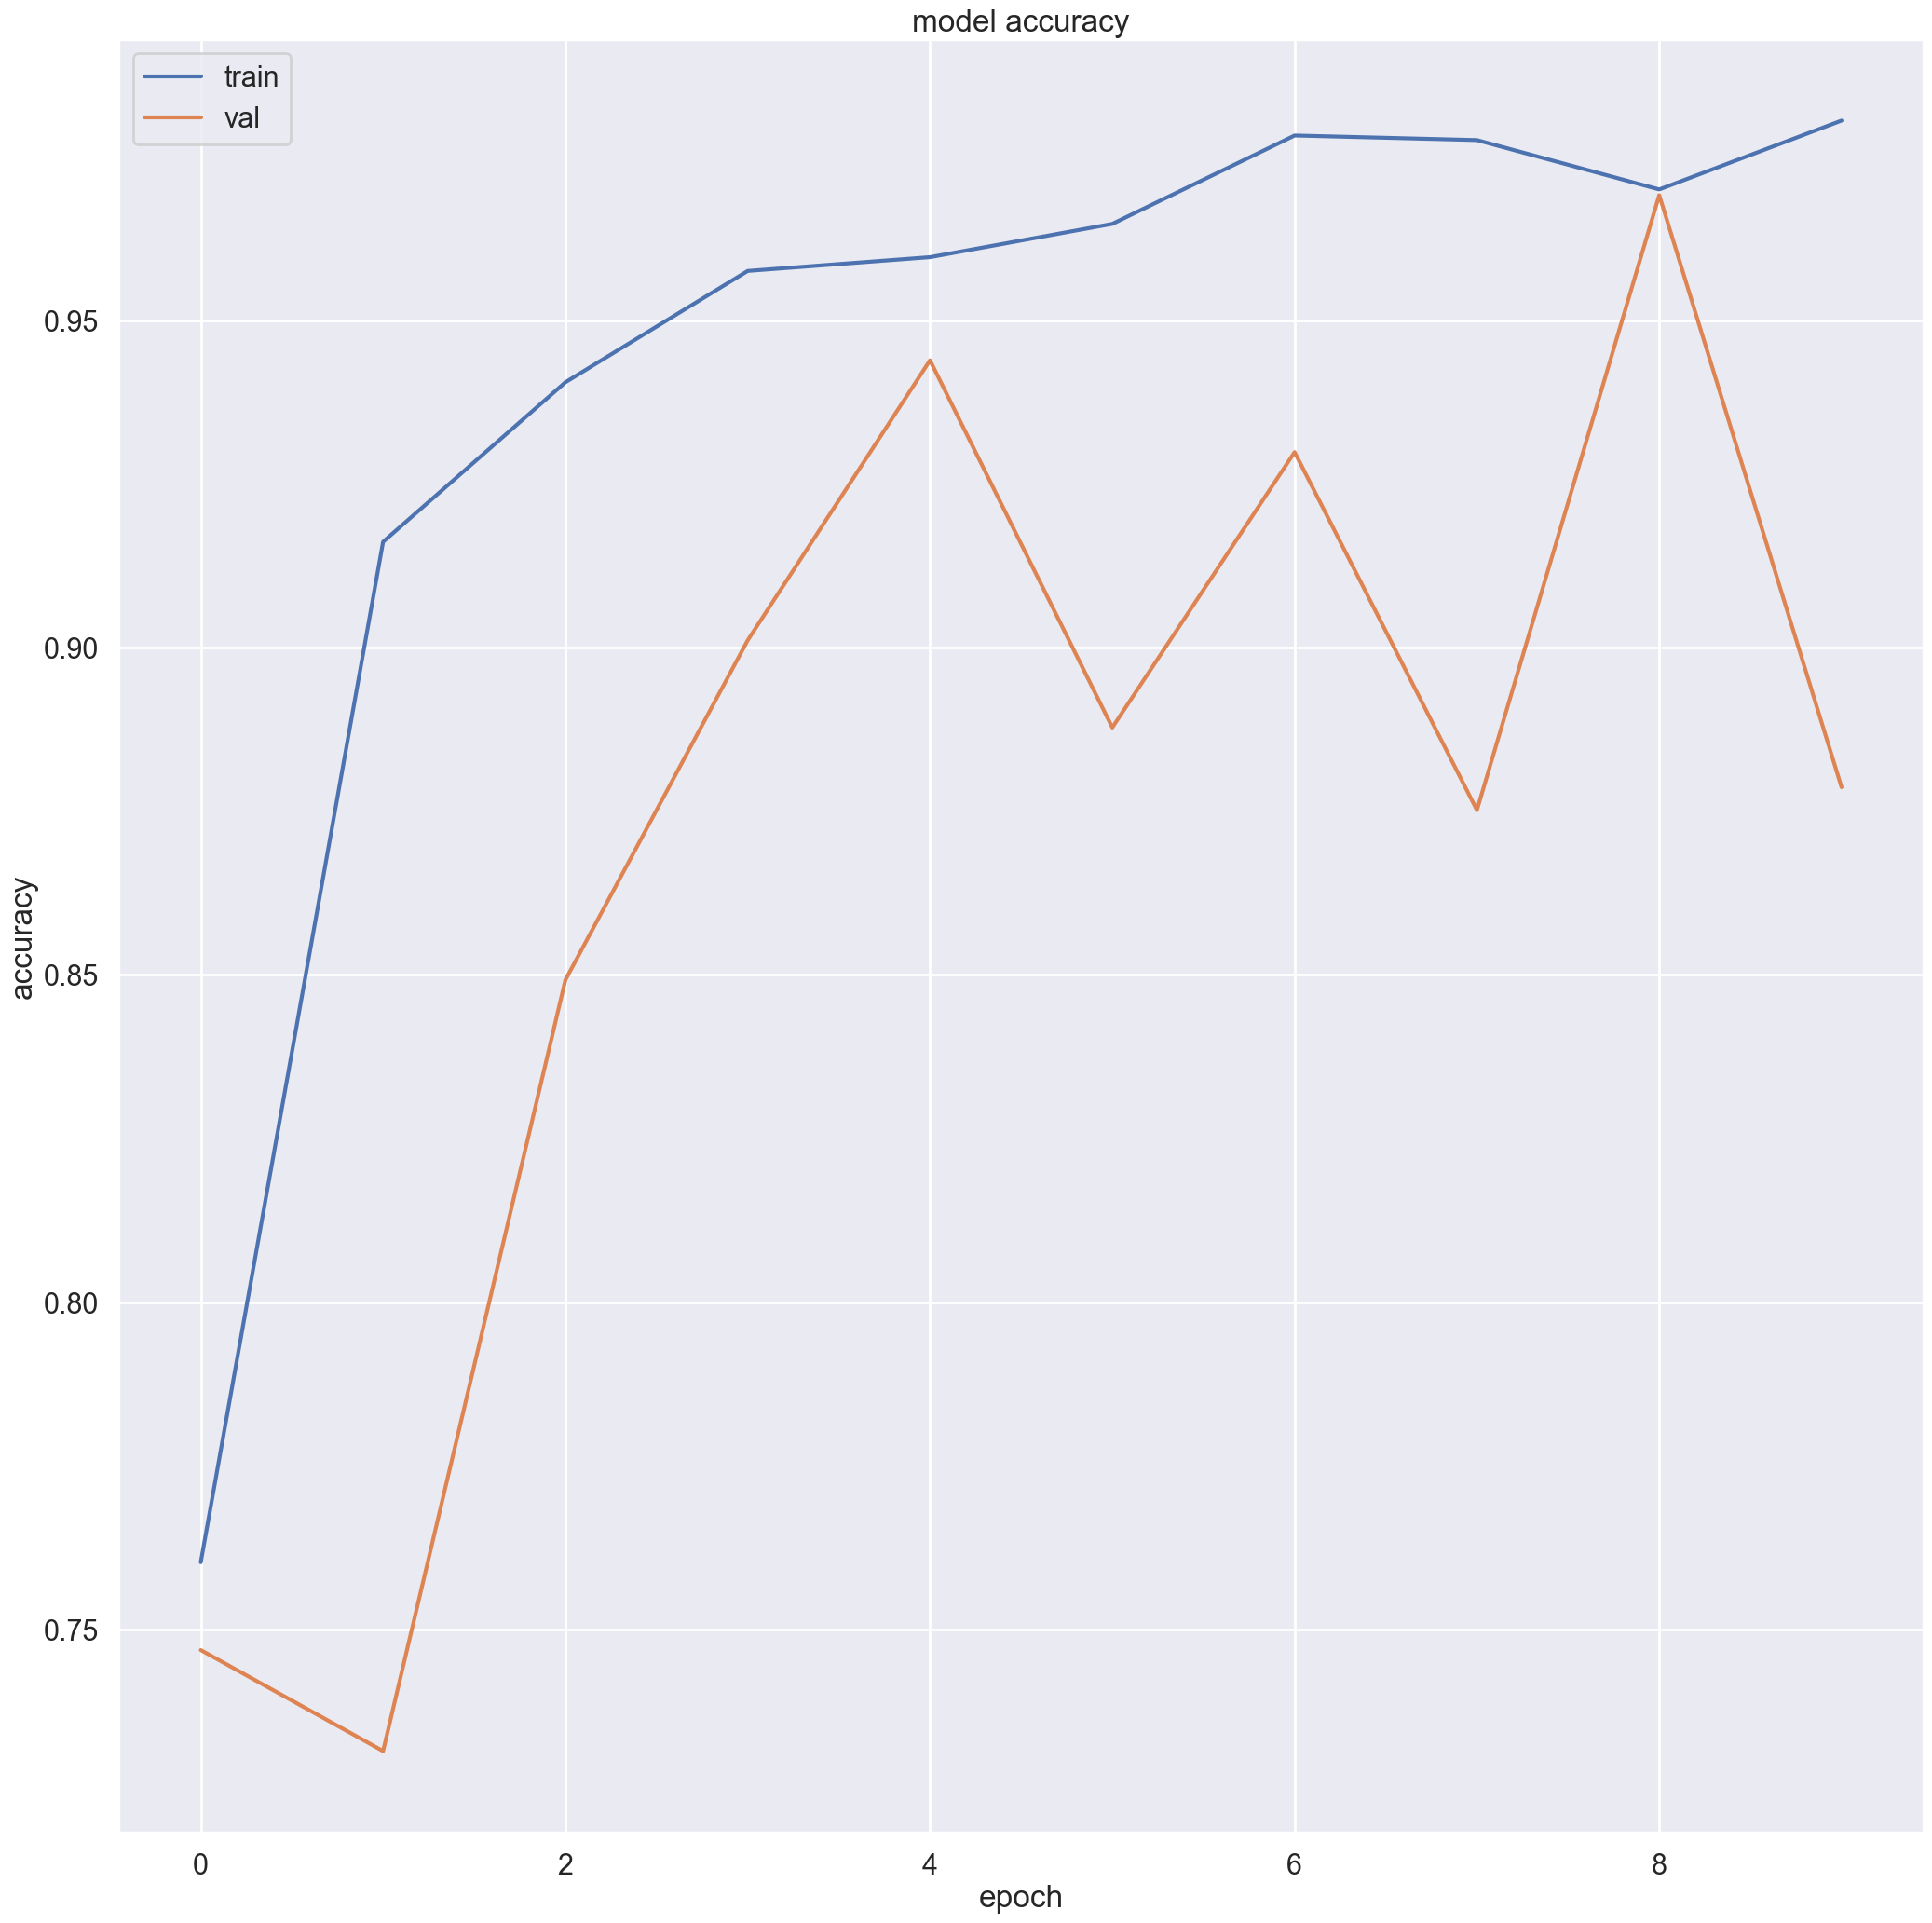

In [15]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.save("model.h5")

In [17]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('C:/Users/adity/Desktop/run jupyter/data/valid_data/')

In [18]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([2.5479468e-14, 1.5145183e-07, 9.9999988e-01], dtype=float32)

In [19]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Potato___Early_blight', 1: 'Potato___Late_blight', 2: 'Potato___healthy'}

In [20]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Potato___healthy
